In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
dat = pd.read_csv("spam.csv", index_col = 0)
print(dat.shape)
dat


(4601, 58)


,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,nonspam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,nonspam
4599,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,nonspam
4600,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,nonspam


In [15]:
#X = dat.drop([ 'Unnamed: 0','type'], axis=1) pour enlever la premiere colonne
X = dat.drop(['type'], axis=1)
y = dat['type']

print(y.unique())
print((y == 'spam').mean())


['spam' 'nonspam']
0.39404477287546186


<Figure size 640x480 with 0 Axes>

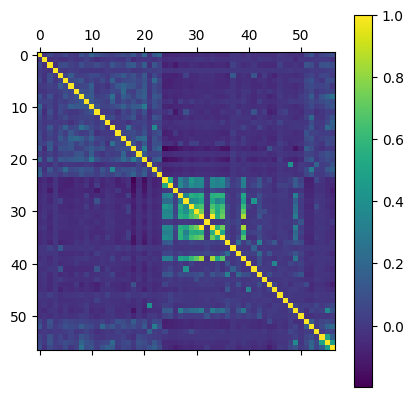

In [16]:
plt.figure()
plt.matshow(np.corrcoef(np.transpose(X)))
plt.colorbar()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
(y_train == 'spam').mean(), (y_test == 'spam').mean()


(0.3988405797101449, 0.3796698523023458)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# par défaut c'est l'algorithme CART qui est implémenté
tree = DecisionTreeClassifier(max_depth=30) 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=30)

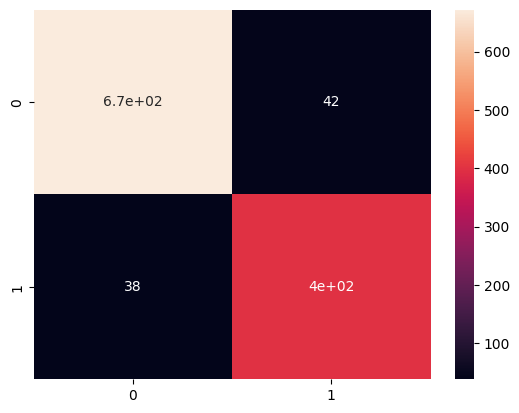

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test, tree.predict(X_test))

plt.figure()
sns.heatmap(conf, annot=True)
plt.show()


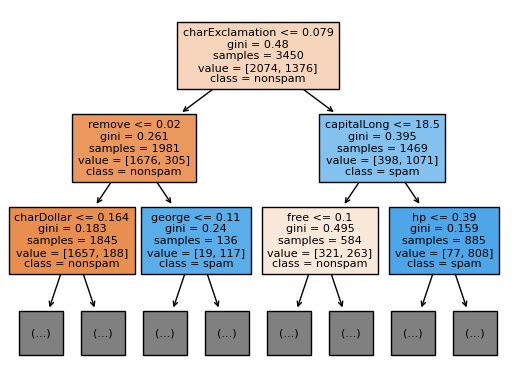

In [20]:
plt.figure()
# jouer avec fontsize pour mieux lire les labels de l'arbre.
plot_tree(tree, max_depth=2, feature_names=X.columns, class_names=tree.classes_, filled=True, fontsize=8)
plt.show()


In [21]:
(y_train == 'spam').sum()
P_test = [] 
P_train = []
for i in np.arange(1, 41):
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(X_train, y_train)
    P_test.append((y_test != tree.predict(X_test)).mean())
    P_train.append((y_train != tree.predict(X_train)).mean())


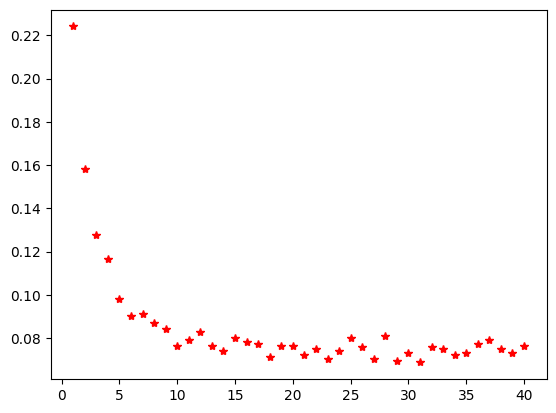

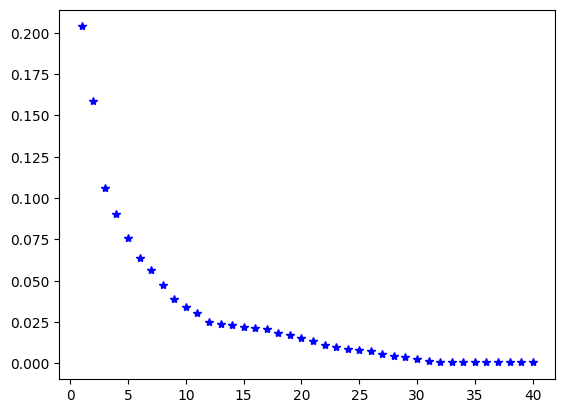

In [22]:
plt.figure()
plt.plot(np.arange(1,41), P_test, 'r*')  
plt.show()

plt.plot(np.arange(1,41), P_train, 'b*') 
plt.show()


ValueError: x and y must have same first dimension, but have shapes (29,) and (39,)

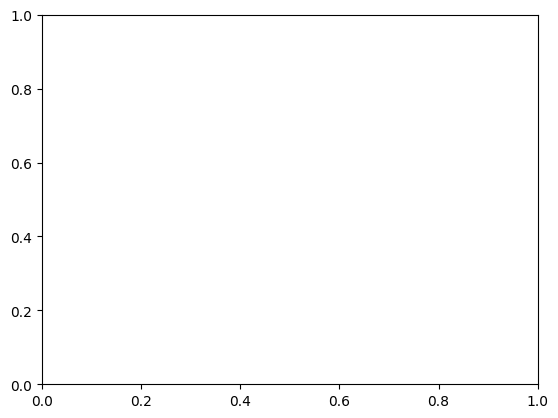

In [23]:
#Pour regarder les différences entre deux itérés
plt.plot(np.arange(1,30), np.diff(np.array(P_test)), 'r*')  
plt.plot(np.arange(1,30), np.diff(np.array(P_train)), 'b*')  
plt.plot((0,30),(0,0), '-')
plt.show()


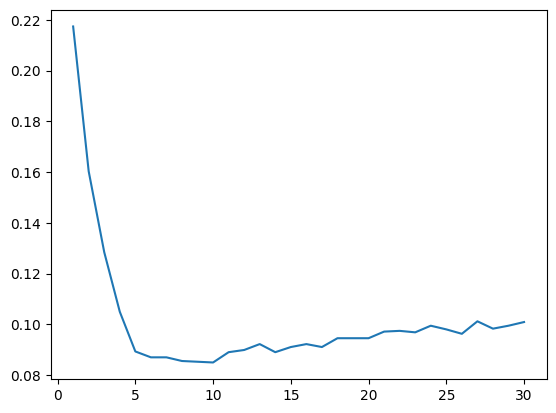

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(1,31)}

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, cv = 10)
clf.fit(X_train, y_train)

clf.best_estimator_
clf.cv_results_['mean_test_score']

plt.plot(np.arange(1,31), 1-clf.cv_results_['mean_test_score'])
plt.show()


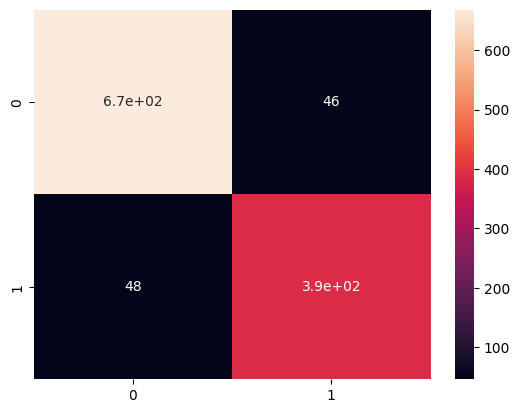

<Axes: >

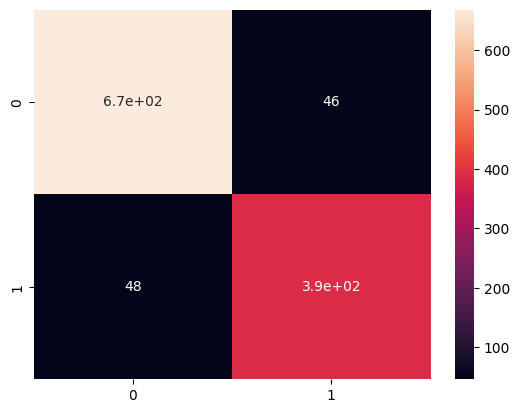

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(conf, annot=True)
plt.show()

(clf.predict(X_test)!= y_test).mean()

conf = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(conf, annot=True)


[[5.98709707e-01 8.83302156e-01 1.12507541e+00 5.96480865e+01
  2.05671504e+00 2.30434189e+00 1.59915321e+01 1.77699964e+00
  2.86734696e+00 1.09176015e+00 7.38167646e-01 8.45489810e-01
  9.01508494e-01 1.10955938e+00 2.47654300e+00 2.52523818e+00
  2.40048832e+00 1.04497518e+00 1.10786328e+00 2.05705273e+00
  1.34689833e+00 1.24031757e+00 9.58251736e+00 1.84818928e+00
  2.04171573e-01 2.79963230e-01 3.40613180e-05 1.49566420e+00
  6.73135996e-02 7.02312189e-01 8.67714431e-01 2.03964501e+01
  5.27495001e-01 3.84988107e+00 7.89436505e-02 2.46348973e+00
  1.04239123e+00 5.61004574e-01 3.61909676e-01 6.98138651e-01
  2.47795646e-04 8.37079679e-02 5.25170165e-01 2.47949377e-01
  3.93943073e-01 2.22842285e-01 8.17844306e-02 1.24986041e-02
  2.60483803e-01 9.39064531e-01 7.24481835e-01 1.29563230e+00
  6.34196246e+02 1.23806865e+01 1.00177666e+00 1.00956386e+00
  1.00053020e+00]]


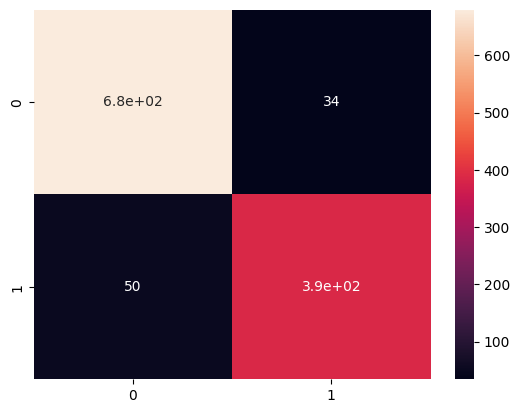

In [26]:
# # Comparaison avec la régression Logit
from sklearn.linear_model import LogisticRegression
SK_logit = LogisticRegression(max_iter=5000, penalty=None)
SK_logit.fit(X_train, y_train)

print((np.exp(SK_logit.coef_)))
conf = confusion_matrix(y_test, SK_logit.predict(X_test))
sns.heatmap(conf, annot=True)
plt.show()


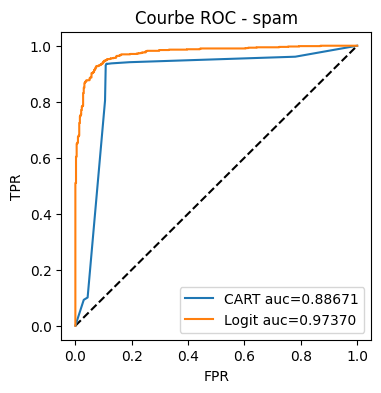

In [27]:
# ## Courbes ROC
from sklearn.metrics import roc_curve, auc

probas = clf.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label = clf.classes_[0] ,  drop_intermediate=False)
fpr0.shape
clf.classes_
fpr0

probas = SK_logit.predict_proba(X_test)
fpr1, tpr1, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label = SK_logit.classes_[0] ,  drop_intermediate=False)
fpr1.shape

auc_tree = auc(fpr0, tpr0) 
auc_logit = auc(fpr1, tpr1)

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr0, tpr0, label='CART auc=%1.5f' % auc_tree)
ax.set_title('Courbe ROC - spam')
ax.plot(fpr1, tpr1, label='Logit auc=%1.5f' % auc_logit)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend() 
plt.show()


In [28]:
# # Random forests
# On regarde l'influence de la taille de la forêt
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=5,oob_score=True)
forest2 = RandomForestClassifier(n_estimators=50,oob_score=True)
forest3 = RandomForestClassifier(n_estimators=200,oob_score=True)
forest1.fit(X_train,y_train)
forest2.fit(X_train,y_train)
forest3.fit(X_train,y_train)

print(1-forest1.oob_score_)
print(1-forest2.oob_score_)
print(1-forest3.oob_score_)


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.13420289855072465
0.05652173913043479
0.0501449275362319


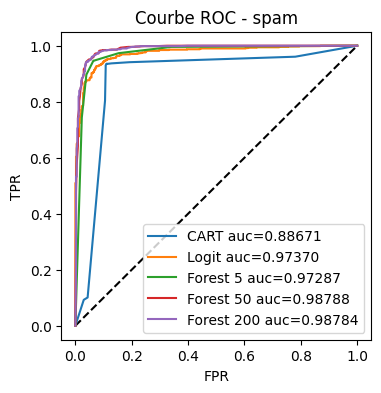

0.04778453518679409

In [29]:
probas = forest1.predict_proba(X_test)
fpr21, tpr21, thresholds21 = roc_curve(y_test, probas[:, 0], pos_label=forest1.classes_[0], drop_intermediate=False)
probas = forest2.predict_proba(X_test)
fpr22, tpr22, thresholds22 = roc_curve(y_test, probas[:, 0], pos_label=forest2.classes_[0], drop_intermediate=False)
probas = forest3.predict_proba(X_test)
fpr23, tpr23, thresholds23 = roc_curve(y_test, probas[:, 0], pos_label=forest3.classes_[0], drop_intermediate=False)


auc_for1 = auc(fpr21, tpr21) 
auc_for2 = auc(fpr22, tpr22) 
auc_for3 = auc(fpr23, tpr23) 


fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr0, tpr0, label='CART auc=%1.5f' % auc_tree)
ax.plot(fpr1, tpr1, label='Logit auc=%1.5f' % auc_logit)
ax.plot(fpr21, tpr21, label= 'Forest 5 auc=%1.5f' % auc_for1)
ax.plot(fpr22, tpr22, label= 'Forest 50 auc=%1.5f' % auc_for2)
ax.plot(fpr23, tpr23, label= 'Forest 200 auc=%1.5f' % auc_for3)
ax.set_title('Courbe ROC - spam')

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()
plt.show()

(y_test!=forest3.predict(X_test)).mean()


# On remarque qu'il y a un réel gain à considérer une foret: 
# La gain de 1 arbre à 5 arbre (bleu contre vert) est très important
# De même celui du passage de 5 à 50 est lui aussi important
# Ensuite on assiste à une stabilisation: augmenter de 50 à 200 arbres améliore les résultats mais beaucoup
# plus marginalement.
# 
# On peut étudier l'influence de la profondeur de l'arbre : l'algorithme offre de meileurs résultats
# sur des arbres profonds (dont le biais est faible) comparé à des arbres de faibles profondeurs.


0.08688097306689835

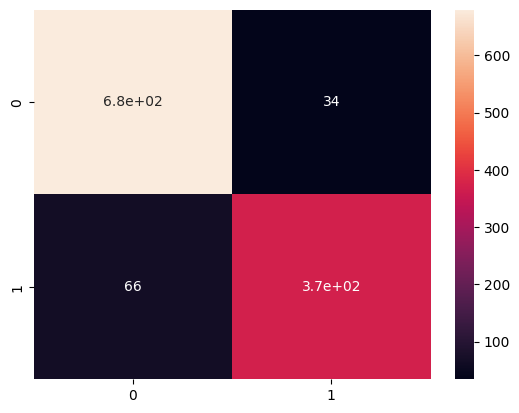

In [30]:
# ## Bagging
from sklearn.ensemble import BaggingClassifier
# arbre peu profond
clfA = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth = 5), n_estimators=100)
clfA.fit(X_train, y_train)

conf = confusion_matrix(y_test, clfA.predict(X_test))
sns.heatmap(conf, annot=True)

(y_test!=clfA.predict(X_test)).mean()


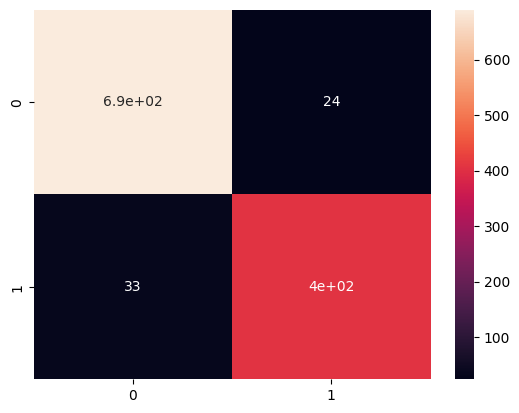

In [31]:
# arbre  profond
clfA = BaggingClassifier(n_estimators=100)
clfA.fit(X_train, y_train)

conf = confusion_matrix(y_test, clfA.predict(X_test))
sns.heatmap(conf, annot=True)

(y_test!=clfA.predict(X_test)).mean()

probas = clfA.predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas[:, 0], pos_label=clfA.classes_[0], drop_intermediate=False)


auc_bag = auc(fpr3, tpr3)


# # BOOSTING
# Le boosting s'utilise comme le bagging, mais se base cette fois sur des estimateur 
# biaisés (arbre peu profond). En pratique ici le choix de la profondeur peut donner
# des résultats sensiblement différents. On peut donc faire ici une recharche de profondeur
# optimale par VC avec GridSearchCV.


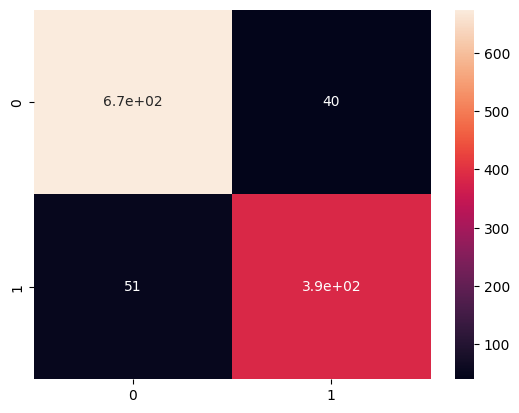

In [32]:
from sklearn.ensemble import AdaBoostClassifier
clfB30 = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=30), n_estimators=50,algorithm='SAMME')
clfB30.fit(X_train, y_train)

clfB = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50,algorithm='SAMME')
clfB.fit(X_train, y_train)

(clfB30.predict(X_test)!= y_test).mean()
(clfB.predict(X_test)!= y_test).mean()


conf = confusion_matrix(y_test, clfB.predict(X_test))
sns.heatmap(conf, annot=True)
probas = clfB.predict_proba(X_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, probas[:, 0], pos_label=clfB.classes_[0], drop_intermediate=False)
auc_boost = auc(fpr4, tpr4)


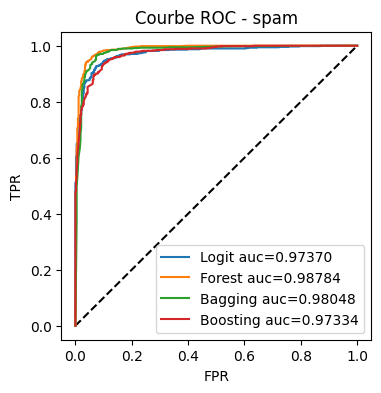

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')

ax.plot(fpr1, tpr1, label='Logit auc=%1.5f' % auc_logit)
ax.plot(fpr23, tpr23, label= 'Forest auc=%1.5f' % auc_for3)
ax.plot(fpr3, tpr3, label= 'Bagging auc=%1.5f' % auc_bag)
ax.plot(fpr4, tpr4, label= 'Boosting auc=%1.5f' % auc_boost)
ax.set_title('Courbe ROC - spam')

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()


In [36]:
# # XGboost

import xgboost as xgb

label_train = (y_train == 'spam')
label_test = (y_test == 'spam')

dtrain = xgb.DMatrix(X_train, label=label_train)
dtest = xgb.DMatrix(X_test, label=label_test)

param = {'max_depth': 30, 'eta': 0.3, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
num_round = 20
evallist = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(param, dtrain, num_round, evallist)

((bst.predict(dtest)>=0.5)!=(y_test=="spam")).mean()


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.97026	eval-auc:0.94674
[1]	train-auc:0.98049	eval-auc:0.95844
[2]	train-auc:0.99144	eval-auc:0.96880
[3]	train-auc:0.99358	eval-auc:0.97718
[4]	train-auc:0.99497	eval-auc:0.97974
[5]	train-auc:0.99614	eval-auc:0.98125
[6]	train-auc:0.99767	eval-auc:0.98276
[7]	train-auc:0.99819	eval-auc:0.98406
[8]	train-auc:0.99863	eval-auc:0.98512
[9]	train-auc:0.99910	eval-auc:0.98648
[10]	train-auc:0.99936	eval-auc:0.98696
[11]	train-auc:0.99953	eval-auc:0.98728
[12]	train-auc:0.99966	eval-auc:0.98768
[13]	train-auc:0.99975	eval-auc:0.98833
[14]	train-auc:0.99981	eval-auc:0.98871
[15]	train-auc:0.99986	eval-auc:0.98873
[16]	train-auc:0.99989	eval-auc:0.98866
[17]	train-auc:0.99992	eval-auc:0.98872
[18]	train-auc:0.99994	eval-auc:0.98868
[19]	train-auc:0.99995	eval-auc:0.98849


0.04691572545612511